In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def read_file(fname: str):
    time = 0.
    accuracy = 0.
    flags = [False, False]
    with open(fname, 'r') as f:
        for line in f:
            if flags[0] and flags[1]:
                return time, accuracy
            if "Braid" in line:
                continue
            if "Test set" in line:
                flags[0] = True
                p, q = line.split()[-2].split('/')
                accuracy = 100*float(p)/float(q)
            if "wall time" in line:
                flags[1] = True
                time = float(line.split()[-1])
        return time, accuracy

In [84]:
sc_levels = ["0", "2", "1", "12", "012"]
fnames = [f"sc{lvls}.out" for lvls in sc_levels]
fnames

['sc0.out', 'sc2.out', 'sc1.out', 'sc12.out', 'sc012.out']

In [85]:
times, accs = [], []
times_fmg, accs_fmg = [], []
time, acc = read_file("serial.out")
times.append(time)
times_fmg.append(time)
accs.append(acc)
accs_fmg.append(acc)

for fname in fnames:
    time, acc = read_file(fname)
    times.append(time)
    accs.append(acc)
    time, acc = read_file(f"fmg_{fname}")
    times_fmg.append(time)
    accs_fmg.append(acc)

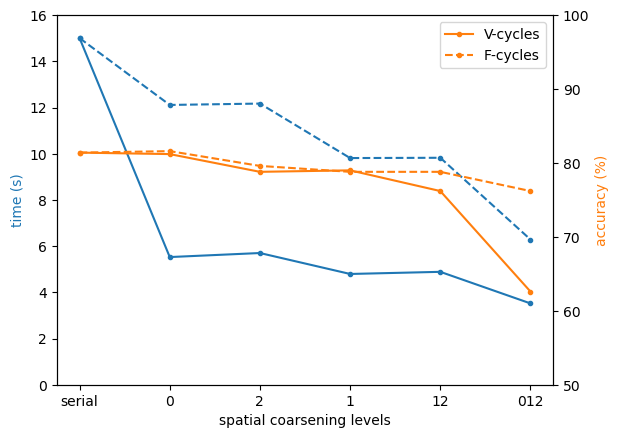

In [86]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(times, '.-', color="C0", label="V-cycles")
ax2.plot(accs, '.-', color="C1", label="V-cycles")
ax1.plot(times_fmg, '.--', color="C0", label="F-cycles")
ax2.plot(accs_fmg, '.--', color="C1", label="F-cycles")
ax1.set_xlabel("spatial coarsening levels")
ax1.set_ylabel("time (s)", color="C0")
ax2.set_ylabel("accuracy (%)", color="C1")
ax1.set_ylim((0, 16))
ax2.set_ylim((50, 100))
plt.xticks(range(len(fnames)+1), ["serial"] + sc_levels)
plt.legend()
plt.show()

In [87]:
speedups = [times[0]/time for time in times[1:]]
speedups_fmg = [times_fmg[0]/time for time in times_fmg[1:]]
accloss = [acc/accs[0] for acc in accs[1:]]
accloss_fmg = [acc/accs_fmg[0] for acc in accs_fmg[1:]]

In [90]:
scores = [speedup*loss**2 for speedup, loss in zip(speedups, accloss)]
scores_fmg = [speedup*loss**2 for speedup, loss in zip(speedups_fmg, accloss_fmg)]

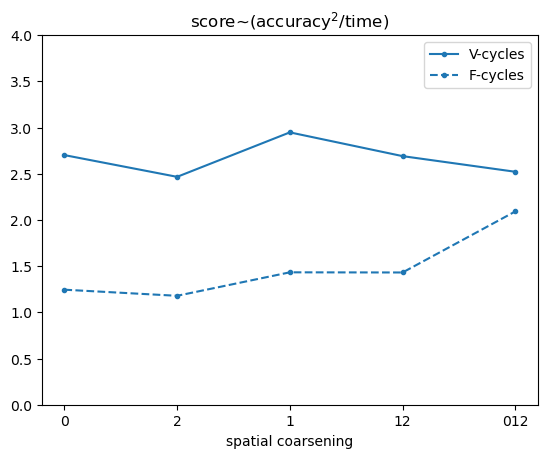

In [91]:
plt.figure()
plt.plot(scores, '.-', label="V-cycles")
plt.plot(scores_fmg, '.--', label="F-cycles", color="C0")
plt.ylim((0, 4))
plt.xticks(range(len(fnames)), sc_levels)
plt.legend()
plt.xlabel("spatial coarsening")
plt.title(r"score~($\mathrm{accuracy}^2/\mathrm{time}$)")
plt.show()

thoughts:
- I'm not particularly convinced by these results
- The spatial coarsening provides a speedup, but the loss of accuracy as a result is severe
- V-cycles were faster, but there appears to be a cross-over after which the loss of accuracy for V-cycles becomes unacceptable
- F-cycles were slower, but there appears to be a cross-over after which the speedup is comparable to V-cycles, with higher accuracy
- "deferred" spatial coarsening didn't really work as expected (loss of accuracy, with virtually no speedup)

Due to the loss of accuracy, much care must be taken applying spatial coarsening. Is it worth it?